In [1]:
from mypgm.base import Factor, CPD, RandomVar
from mypgm.exacted import ExpectedUtility, ArcInversion
from mypgm.pgms import InfluenceDiagram

Expected utily of the first action: 0.0
Expected utily of the second action: 2.0
Maximal expected utily for action: Found 
(0,) -> 0.0
(1,) -> 1.0



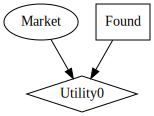

In [5]:
# random variable for the market: 3 possible situations
M = RandomVar('Market', 3)
# 2 possible action to take: to found or not to found the market
F = RandomVar('Found', 2)

# utility table of the actions given the values of the market
uMF = Factor([M, F], [0, -7, 0, 5, 0, 20],  mod='utility')
uMF.to_dataframe()
# probability table for the market
cM = CPD([M], [0.5, 0.3, 0.2])

dF = Factor([F], mod='decision')
# Alternative decision rules for F
dF_1 = CPD([F], [1.0, 0])
dF_2 = CPD([F], [0, 1.0])  # Optimal

id_ = InfluenceDiagram([cM], [uMF], [dF])
eu = ExpectedUtility(id_)

print('Expected utily of the first action:', eu.expected_utility([dF_1]))
print('Expected utily of the second action:', eu.expected_utility([dF_2]))

print('Maximal expected utily for action:', eu.optimal_decision_rule([F]))

id_.viz()

In [3]:
uMF.to_dataframe()

,Found=0,Found=1
Market,,
0,0,-7
1,0,5
2,0,20


In [14]:
cST.marginto_dataframe()

,"Market=0,Test=0","Market=0,Test=1","Market=1,Test=0","Market=1,Test=1","Market=2,Test=0","Market=2,Test=1"
Survey,,,,,,
0,0.0,0.6,0.0,0.3,0.0,0.1
1,0.0,0.3,0.0,0.4,0.0,0.4
2,0.0,0.1,0.0,0.3,0.0,0.5
3,1.0,0.0,1.0,0.0,1.0,0.0


0.0
1.0000000000000004
2.0
2.2500000000000004
1.0000000000000004
2.2500000000000004


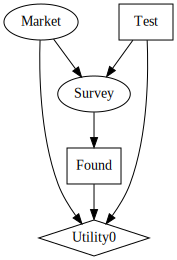

In [3]:
M = RandomVar('Market', 3)
S = RandomVar('Survey', 4)  # S = 3 means no survey

T = RandomVar('Test', 2, mod='decision')
F = RandomVar('Found', 2, mod='decision')

#uMF = Factor([M, F], [0, -7, 0, 5, 0, 20], mod='utility')
#uT = Factor([T], [0, -1], mod='utility')
u = Factor([M, F, T], [0, -1, -7, -8, 0, -1, 5, 4, 0, -1, 20, 19], mod='utility')

cM = CPD([M], [0.5, 0.3, 0.2])

cST = CPD([S, M, T], [0.0, 0.6, 0.0, 0.3, 0.0, 0.1,
                          0.0, 0.3, 0.0, 0.4, 0.0, 0.4,
                          0.0, 0.1, 0.0, 0.3, 0.0, 0.5,
                          1.0, 0.0, 1.0, 0.0, 1.0, 0.0])

#dFS = Factor([F, S])
dFS = Factor([F, S], mod='decision')
# Alternative decision rules for F given S
dFS_1 = CPD([F, S], [0, 0, 0, 1, 1, 1, 1, 0])
dFS_2 = CPD([F, S], [1, 0, 0, 0, 0, 1, 1, 1])  # Optimal
dFS_3 = CPD([F, S], [0, 0, 0, 0, 1, 1, 1, 1]) 


dT = Factor([T], mod='decision')
# Alternative decision rules for T
dT_1 = CPD([T], [1.0, 0.0], mod='decision')
dT_2 = CPD([T], [0.0, 1.0], mod='decision')  # Optimal


#id1 = InfluenceDiagram([cM, cST], [uMF, uT], [dT, dFS])
id1 = InfluenceDiagram([cM, cST], [u], [dT, dFS])
eu = ExpectedUtility(id1)

#print(eu.optimal_decision_rule([T]))

print(eu.expected_utility([dFS_1, dT_1]))
print(eu.expected_utility([dFS_1, dT_2]))
print(eu.expected_utility([dFS_2, dT_1]))
print(eu.expected_utility([dFS_2, dT_2]))



#id2 = InfluenceDiagram([cM, cST], [uMF, uT], [dT, dFS])
#eu2 = ExpectedUtility(id1)

opt_T = dT_2

print(eu.expected_utility([dFS_3, dT_2]))

#dFS_optimal = eu2.optimal_decision_rule([F, S])
dFS_optimal = eu.optimal_decision_rule([F, S])
dT_optimal = eu.optimal_decision_rule([T])
print(eu.expected_utility([dFS_optimal, opt_T]))

id1.graph()
id1.viz()

In [21]:
eu.optimal_decision_rule([T], [dFS_2])

Test 
(0,) -> 0.0
(1,) -> 1.0

In [22]:
cST.marginalize(M).to_cpd().to_dataframe()

,Test=0,Test=1
Survey,,
0,0.0,0.333333
1,0.0,0.366667
2,0.0,0.300000
3,1.0,0.000000


In [6]:
ai.update_id().viz()

In [4]:
ai.decisions

[Found Survey 
 (0, 0) -> 1.0
 (0, 1) -> 0.0
 (0, 2) -> 0.0
 (0, 3) -> 0.0
 (1, 0) -> 0.0
 (1, 1) -> 1.0
 (1, 2) -> 1.0
 (1, 3) -> 1.0, Test 
 (0,) -> 0.0
 (1,) -> 1.0]

In [4]:
ai = ArcInversion(id1)
ai.solve()

Regular ID
Start:
Chance node to remove: None
Decision node to remove: None
[Survey, 'u0']
Node to reverse: Market
Arc reversed for: Market
Removed node: Market
Chance node to remove: None
Decision node to remove: Found
Removed decision node: Found
Chance node to remove: Survey
Removed chance node: Survey
Chance node to remove: None
Decision node to remove: Test
Removed decision node: Test


(<mypgm.pgms.InfluenceDiagram at 0x1320de890>, [Found Survey 
  (0, 0) -> 1.0
  (0, 1) -> 0.0
  (0, 2) -> 0.0
  (0, 3) -> 0.0
  (1, 0) -> 0.0
  (1, 1) -> 1.0
  (1, 2) -> 1.0
  (1, 3) -> 1.0, Test 
  (0,) -> 0.0
  (1,) -> 1.0], [Test 
  (0,) -> 2.0
  (1,) -> 2.829761904761905])

In [4]:
ai.decisions

[Found Survey 
 (0, 0) -> 1.0
 (0, 1) -> 0.0
 (0, 2) -> 0.0
 (0, 3) -> 0.0
 (1, 0) -> 0.0
 (1, 1) -> 1.0
 (1, 2) -> 1.0
 (1, 3) -> 1.0, Test 
 (0,) -> 0.0
 (1,) -> 1.0]

In [3]:
ai = ArcInversion(id1)

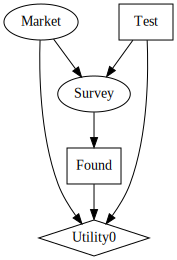

In [4]:
first=ai.barren_node_removal(id1)
first.viz()

In [5]:
model = ai.barren_node_removal(first)
i = ai.find_node_no_ds(model)
print(i)

[Found]
[Survey, 'u0']
Market


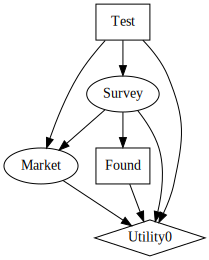

In [6]:
model=ai.reverse_arc(i, model)
model.viz()

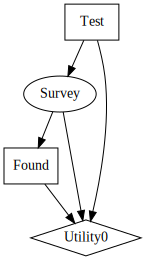

In [7]:
model = ai.remove_chance_node(model, i)
model.viz()

In [14]:
to_remove_ = ai.find_decision_node(model)
print(to_remove_)

Test


In [18]:
ai.gd.factors[0].scope

[]

In [6]:
eu = ExpectedUtility(model)

NameError: name 'model' is not defined

In [15]:
eu.optimal_decision_rule([T])

Test 
(0,) -> 0.0
(1,) -> 1.0

In [5]:
print(eu.expected_utility([dFS_1, dT_1]))
print(eu.expected_utility([dFS_1, dT_2]))
print(eu.expected_utility([dFS_2, dT_1]))
print(eu.expected_utility([dFS_2, dT_2]))

0.0
1.0000000000000004
2.0
2.2500000000000004


In [18]:
eu1 = ExpectedUtility(model)
eu1.optimal_decision_rule([T], [dFS_2])

Test 
(0,) -> 1.0
(1,) -> 0.0

In [15]:
model, decision_ = ai.remove_decision_node(model, to_remove_)
decision_

Test 
(0,) -> 0.0
(1,) -> 1.0

In [16]:
model.viz()

In [11]:
j = ai.find_chance_node(model)
print(j)

Survey


In [123]:
fc = list(ai.gd.factors)

In [12]:
model = ai.remove_chance_node(model, j)

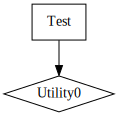

In [13]:
model.viz()

Max EU at iteration 0: 0.1499999999999999
Starting simulation...
Max EU at the end: 2.25
End simulation: time spend = 0.3496971130371094
Best: [0, 1, 0, 0, 0]
Optimal strategy: [Test 
(0,) -> 0
(1,) -> 1
, Found Survey 
(0, 0) -> 1
(0, 1) -> 0
(0, 2) -> 0
(0, 3) -> 0
(1, 0) -> 0
(1, 1) -> 1
(1, 2) -> 1
(1, 3) -> 1
]


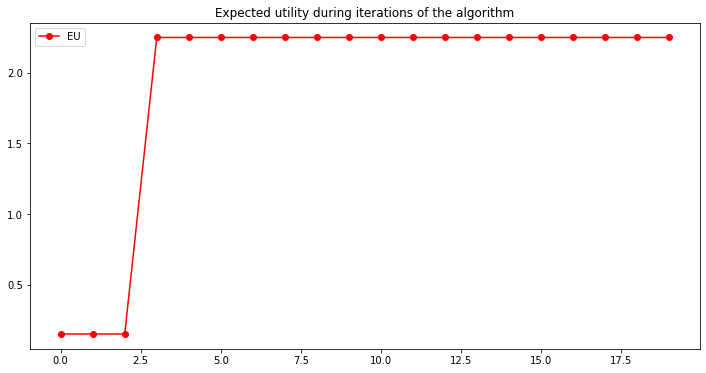

In [9]:
from mypgm.approximated import heuristicID

h = heuristicID(id1, [dT, dFS])
h.run_algorithm(max_epochs = 20, mut=0.9, population_size = 2, crossp=0.8)